In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data file
df = pd.read_csv('gym_members_exercise_tracking.csv')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,age,gender,weight_(kg),height_(m),max_bpm,avg_bpm,resting_bpm,session_duration_(hours),calories_burned,workout_type,fat_percentage,water_intake_(liters),workout_frequency_(days/week),experience_level,bmi
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


## EDA

In [5]:
#Check for nulls
df.isnull().sum()

age                              0
gender                           0
weight_(kg)                      0
height_(m)                       0
max_bpm                          0
avg_bpm                          0
resting_bpm                      0
session_duration_(hours)         0
calories_burned                  0
workout_type                     0
fat_percentage                   0
water_intake_(liters)            0
workout_frequency_(days/week)    0
experience_level                 0
bmi                              0
dtype: int64

In [6]:
#Check for nan
df.isna().sum()

age                              0
gender                           0
weight_(kg)                      0
height_(m)                       0
max_bpm                          0
avg_bpm                          0
resting_bpm                      0
session_duration_(hours)         0
calories_burned                  0
workout_type                     0
fat_percentage                   0
water_intake_(liters)            0
workout_frequency_(days/week)    0
experience_level                 0
bmi                              0
dtype: int64

In [7]:
df.dtypes

age                                int64
gender                            object
weight_(kg)                      float64
height_(m)                       float64
max_bpm                            int64
avg_bpm                            int64
resting_bpm                        int64
session_duration_(hours)         float64
calories_burned                  float64
workout_type                      object
fat_percentage                   float64
water_intake_(liters)            float64
workout_frequency_(days/week)      int64
experience_level                   int64
bmi                              float64
dtype: object

In [8]:
categoricals = list(df.dtypes[df.dtypes == 'object'].index)
categoricals

['gender', 'workout_type']

In [9]:
for col in categoricals:
    df[col]=df[col].str.lower().str.replace(' ', '_')
df.head()

,age,gender,weight_(kg),height_(m),max_bpm,avg_bpm,resting_bpm,session_duration_(hours),calories_burned,workout_type,fat_percentage,water_intake_(liters),workout_frequency_(days/week),experience_level,bmi
0,56,male,88.3,1.71,180,157,60,1.69,1313.0,yoga,12.6,3.5,4,3,30.20
1,46,female,74.9,1.53,179,151,66,1.30,883.0,hiit,33.9,2.1,4,2,32.00
2,32,female,68.1,1.66,167,122,54,1.11,677.0,cardio,33.4,2.3,4,2,24.71
3,25,male,53.2,1.70,190,164,56,0.59,532.0,strength,28.8,2.1,3,1,18.41
4,38,male,46.1,1.79,188,158,68,0.64,556.0,strength,29.2,2.8,3,1,14.39


<Axes: xlabel='calories_burned', ylabel='Count'>

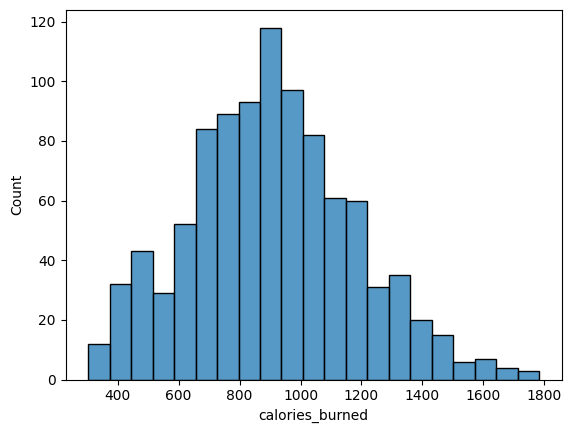

In [10]:
sns.histplot(df.calories_burned)

In [11]:
numericals = list(df.dtypes[df.dtypes != 'object'].index)
numericals

['age',
 'weight_(kg)',
 'height_(m)',
 'max_bpm',
 'avg_bpm',
 'resting_bpm',
 'session_duration_(hours)',
 'calories_burned',
 'fat_percentage',
 'water_intake_(liters)',
 'workout_frequency_(days/week)',
 'experience_level',
 'bmi']

In [12]:
#Look for anything weird
df.describe()

,age,weight_(kg),height_(m),max_bpm,avg_bpm,resting_bpm,session_duration_(hours),calories_burned,fat_percentage,water_intake_(liters),workout_frequency_(days/week),experience_level,bmi
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [13]:
#Check correlation
df[numericals].corr()

,age,weight_(kg),height_(m),max_bpm,avg_bpm,resting_bpm,session_duration_(hours),calories_burned,fat_percentage,water_intake_(liters),workout_frequency_(days/week),experience_level,bmi
age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691
weight_(kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158
height_(m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
max_bpm,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105
avg_bpm,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605
resting_bpm,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543
session_duration_(hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493
calories_burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761
fat_percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258
water_intake_(liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697


## Feature Selection



I will remove some poorly correlated features with the target variable "calories_burned". Based on correlation, i should remove: age, weight, height, max_bpm, resting_bpm and bmi. I'll keep bmi because it carries some information about weight and height but probably won't be relevant. 

In [14]:
numericals = [
    'avg_bpm',
    'resting_bpm',
    'session_duration_(hours)',
    'calories_burned',
    'fat_percentage',
    'water_intake_(liters)',
    'workout_frequency_(days/week)',
    'experience_level',
    'bmi'
    ]

For the Categorical features I read this article:
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

But i don't think there's a need to apply any of the methods and i think it's possible to identify the least useful fetures by direct observation...

In [15]:
categoricals

['gender', 'workout_type']

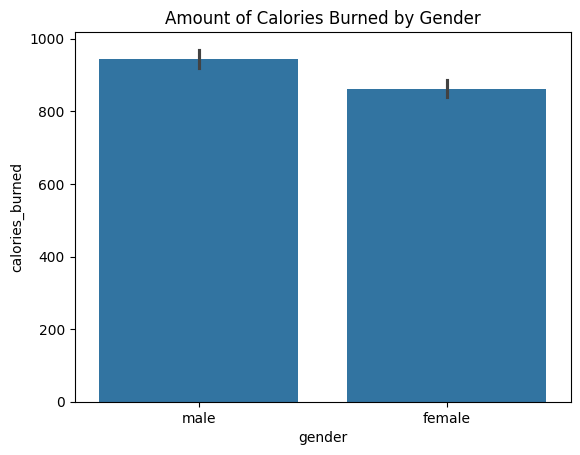

In [16]:
sns.barplot(x=df.gender,y=df.calories_burned,data=df)
plt.title('Amount of Calories Burned by Gender')
plt.show()

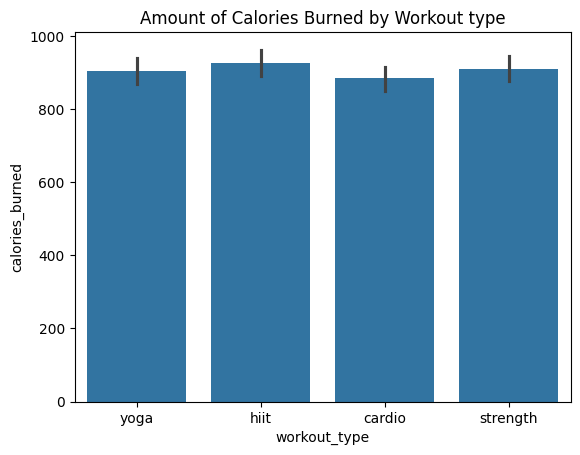

In [17]:
sns.barplot(x=df.workout_type,y=df.calories_burned,data=df)
plt.title('Amount of Calories Burned by Workout type')
plt.show()

Both categorical features don't seem to impact calorie burning very much, especially workout type, so i'll remove the feature 'workout_type'.

In [18]:
categoricals=['gender']

## Prepare for training

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_full_train, df_test = train_test_split(df[numericals+categoricals], test_size=0.2, random_state=39)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=39)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train.calories_burned.values
y_val = df_val.calories_burned.values
y_test = df_test.calories_burned.values

In [23]:
del df_train['calories_burned']
del df_val['calories_burned']
del df_test['calories_burned']

## Train Linear Regression 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction import DictVectorizer

In [25]:
def train_linear_regression(df_train, y_train):

    train_dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(train_dicts)

    model = LinearRegression()
    model.fit(X_train, y_train)

    return model, dv

In [26]:
regression_model, regression_dv= train_linear_regression(df_train, y_train)

In [27]:
def predict(df_val, dv, model):
    val_dicts = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    y_pred = model.predict(X_val)

    return y_pred

In [28]:
y_pred=predict(df_val,regression_dv,regression_model)

In [29]:
score_mse=mean_squared_error(y_val, y_pred)
score_mse

np.float64(3280.0496306779173)

In [30]:
score_mae=mean_absolute_error(y_val, y_pred)
score_mae

np.float64(49.56056576349195)

In [31]:
def plot_predictions_and_true_values(pred, true):
    plt.plot(pred, label = 'Predictions')
    plt.plot(true, label = 'TrueValues')
    plt.title('Pred vs True')
    plt.legend()
    plt.show()

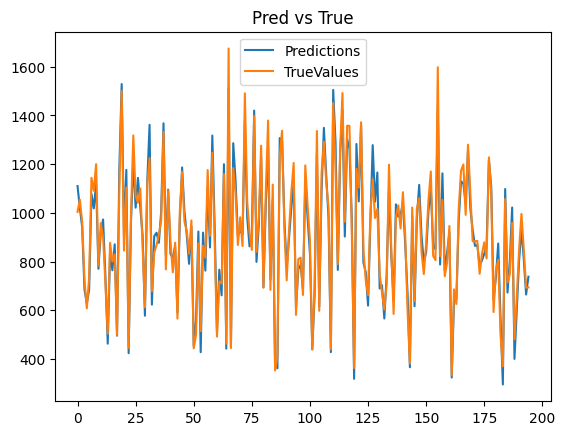

In [32]:
plot_predictions_and_true_values(y_pred,y_val)

## Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
def train_decision_tree_regressor(df_train, y_train, max_depth=None, min_samples_leaf=1):

    train_dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(train_dicts)

    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)

    return model, dv

In [35]:
model_decision_tree, dv_decision_tree = train_decision_tree_regressor(df_train, y_train)

In [36]:
y_pred=predict(df_val, dv_decision_tree, model_decision_tree)

In [37]:
score_mse=mean_squared_error(y_pred, y_val)
score_mse

np.float64(7954.374358974359)

In [38]:
score_mae=mean_absolute_error(y_pred, y_val)
score_mae

np.float64(68.98974358974358)

### Tune Decision Tree

In [39]:
depths=[1,2,3,4,5,6,7,8,9,10,15,20]
min_leafs=[1,2,3,5,10,20,50,100]

In [40]:
scores=[]

for d in depths:
    for l in min_leafs:
        model, dv = train_decision_tree_regressor(df_train,y_train,d,l)
        y_pred=predict(df_val,dv,model)
        mse=mean_squared_error(y_pred, y_val)

        scores.append((d,l,mse))


In [41]:
score_df_columns = ['max_depth','min_leafs','mse']
score_df = pd.DataFrame(scores, columns=score_df_columns)
score_df

,max_depth,min_leafs,mse
0,1,1,33648.984729
1,1,2,33648.984729
2,1,3,33648.984729
3,1,5,33648.984729
4,1,10,33648.984729
...,...,...,...
91,20,5,7153.994105
92,20,10,6073.541926
93,20,20,7845.124737
94,20,50,11375.571856


In [42]:
scores_df_pivot = score_df.pivot(index='min_leafs', columns=['max_depth'], values=['mse'])
scores_df_pivot.round(2)

mse                                                    \
max_depth        1         2         3         4         5         6    
min_leafs                                                               
1          33648.98  16514.28   9259.08   9379.71   7893.05   6815.25   
2          33648.98  16514.28   9259.08   9379.71   7893.05   6568.71   
3          33648.98  16514.28   9259.08   9379.71   8117.64   6978.68   
5          33648.98  16514.28   9259.08   9184.41   8060.67   7198.22   
10         33648.98  16514.28   9259.08   8794.39   6751.62   6151.92   
20         33648.98  16514.28   9259.08   9120.17   7845.12   7845.12   
50         33648.98  16514.28  11733.26  11375.57  11375.57  11375.57   
100        33648.98  16208.25  16208.25  16208.25  16208.25  16208.25   

                                                                       
max_depth        7         8         9         10        15        20  
min_leafs                                                              
1           6601.82   7453.52   7950.59   7803.20   7926.86   7017.91  
2           6591.82   7229.99   7192.06   7165.20   7287.39   7204.40  
3           6757.66   6883.31   6949.90   7143.35   7155.24   7139.95  
5           7086.23   7141.02   7163.41   7160.43   7153.99   7153.99  
10          5986.82   6084.77   6073.54   6073.54   6073.54   6073.54  
20          7845.12   7845.12   7845.12   7845.12   7845.12   7845.12  
50         11375.57  11375.57  11375.57  11375.57  11375.57  11375.57  
100        16208.25  16208.25  16208.25  16208.25  16208.25  16208.25

<Axes: xlabel='None-max_depth', ylabel='min_leafs'>

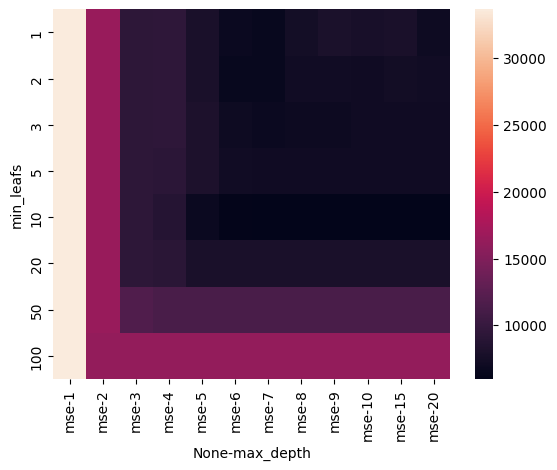

In [43]:
sns.heatmap(scores_df_pivot, fmt=".3f")

In [44]:
# Find best parameter values
min_column = scores_df_pivot.min().idxmin()
min_index = scores_df_pivot[min_column].idxmin()
min_column,min_index

(('mse', np.int64(7)), np.int64(10))

In [45]:
decision_tree_model, decision_tree_dv = train_decision_tree_regressor(df_train,y_train,max_depth=7,min_samples_leaf=10)

In [46]:
y_pred=predict(df_val,decision_tree_dv,decision_tree_model)

In [47]:
val_mse=mean_squared_error(y_val, y_pred)
val_mse

np.float64(5986.817597665566)

In [48]:
y_pred_train=predict(df_train,decision_tree_dv,decision_tree_model)
mean_squared_error(y_train,y_pred_train)

np.float64(3404.02922087517)

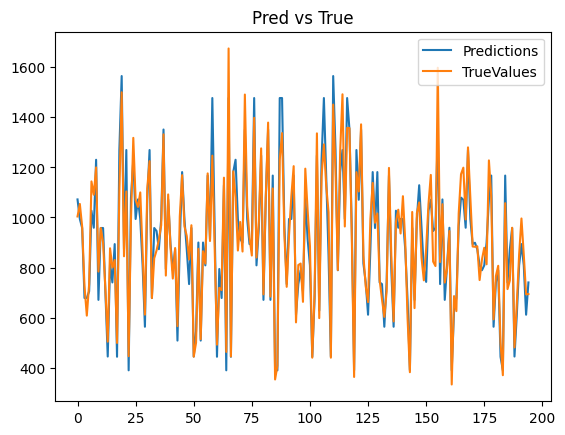

In [49]:
plot_predictions_and_true_values(y_pred,y_val)

## Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
def train_random_forest_regressor(df_train, y_train, n_estimators=100, max_depth=None):

    train_dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(train_dicts)

    model = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth, random_state=11)
    model.fit(X_train, y_train)

    return model, dv

In [52]:
rf_first_model, rf_first_dv = train_random_forest_regressor(df_train,y_train)

In [53]:
y_pred=predict(df_val, rf_first_dv, rf_first_model)

In [54]:
mean_squared_error(y_val, y_pred)

np.float64(3818.6838953846145)

### Model Tuning

In [55]:
n_est=[1,2,3,4,5,10,20,30]
m_d=[1,2,3,4,5,8,10,15,20]

scores=[]
for n in n_est:
    for m in m_d:
        model, dv = train_random_forest_regressor(df_train,y_train,n_estimators=n,max_depth=m)
        y_pred=predict(df_val,dv,model)
        mse=mean_squared_error(y_pred, y_val)

        scores.append((n,m,mse))

In [56]:
score_df_columns = ['n_estimators','max_depth','mse']
score_df = pd.DataFrame(scores, columns=score_df_columns)
score_df

,n_estimators,max_depth,mse
0,1,1,33622.578613
1,1,2,15936.773181
2,1,3,9641.910250
3,1,4,9027.864384
4,1,5,8307.624086
...,...,...,...
67,30,5,4118.945237
68,30,8,3634.813958
69,30,10,3752.250860
70,30,15,3619.094224


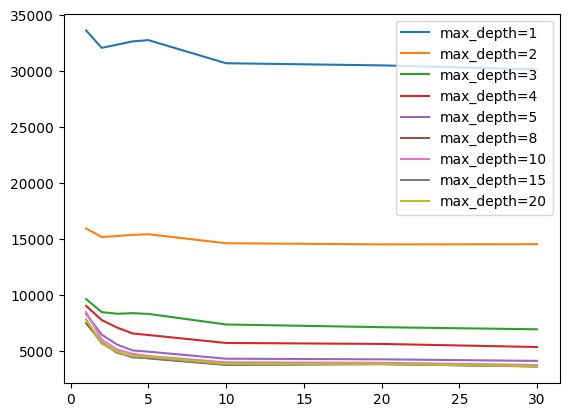

In [57]:
for d in m_d:
    df_subset = score_df[score_df.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.mse,
             label='max_depth=%d' % d)

plt.legend()

In [58]:
scores_df_pivot = score_df.pivot(index='n_estimators', columns=['max_depth'], values=['mse'])
scores_df_pivot.round(2)

mse                                                         \
max_depth           1         2        3        4        5        8        10   
n_estimators                                                                    
1             33622.58  15936.77  9641.91  9027.86  8307.62  7484.03  8479.96   
2             32071.75  15178.39  8471.10  7766.39  6465.95  5756.02  6024.56   
3             32358.34  15267.67  8329.08  7088.10  5569.97  4838.05  5129.93   
4             32650.92  15368.91  8379.71  6559.64  5048.32  4516.81  4744.46   
5             32759.80  15429.25  8314.36  6430.56  4942.28  4339.16  4553.12   
10            30696.83  14622.91  7369.78  5718.10  4312.55  3761.91  3992.52   
20            30506.35  14522.63  7127.66  5632.97  4256.65  3840.22  3946.51   
30            30145.74  14540.82  6939.41  5356.22  4118.95  3634.81  3752.25   

                                
max_depth          15       20  
n_estimators                    
1             7787.89  7787.89  
2             5675.12  5675.12  
3             4926.10  4919.81  
4             4416.51  4546.01  
5             4388.19  4494.75  
10            3797.93  3857.43  
20            3826.35  3843.52  
30            3619.09  3650.00

<Axes: xlabel='None-max_depth', ylabel='n_estimators'>

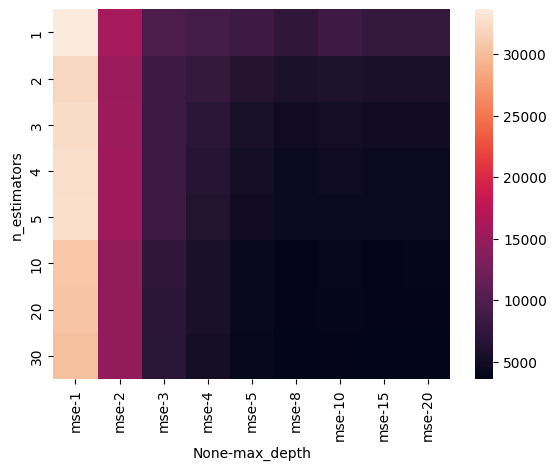

In [59]:
sns.heatmap(scores_df_pivot, fmt=".3f")

In [60]:
# Find best parameter values
min_column = scores_df_pivot.min().idxmin()
min_index = scores_df_pivot[min_column].idxmin()
min_column,min_index

(('mse', np.int64(15)), np.int64(30))

In [61]:
model_rf, dv_rf = train_random_forest_regressor(df_train,y_train, n_estimators=30, max_depth=15)

In [62]:
mean_squared_error(y_val, y_pred)

np.float64(3650.0029686609682)

In [63]:
#Check train metrics to check overfitting
y_pred_train=predict(df_train,dv_rf,model_rf)
mean_squared_error(y_train, y_pred_train)

np.float64(570.2027577949304)

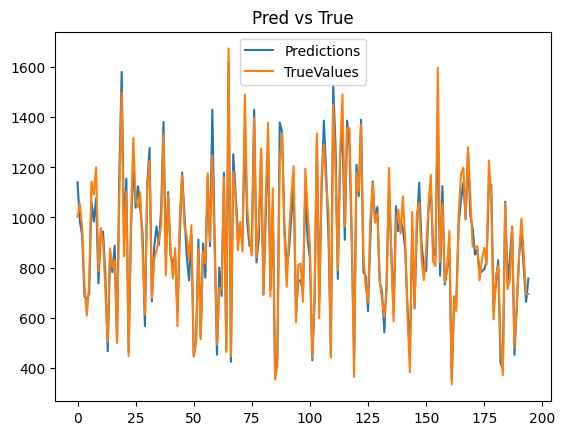

In [64]:
plot_predictions_and_true_values(y_pred, y_val)

## XGBoost

In [65]:
import xgboost as xgb

In [66]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

model = xgb.XGBRegressor(n_estimators=100,max_depth=3,eta=0.3)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [67]:
y_pred=predict(df_val,dv,model)

In [68]:
mean_squared_error(y_val, y_pred)

np.float64(3284.299871628927)

In [69]:
mean_squared_error(y_train, predict(df_train,dv,model))

np.float64(478.0152631427623)

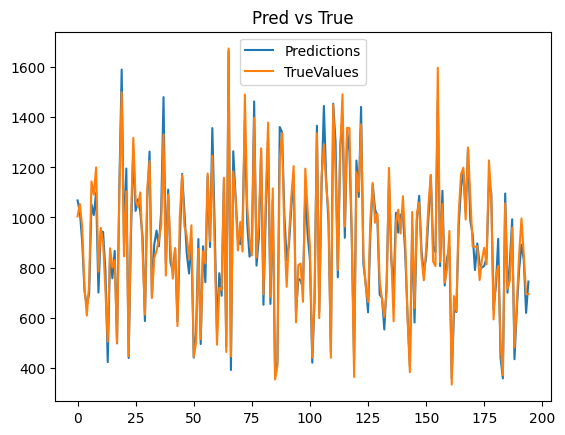

In [70]:
plot_predictions_and_true_values(y_pred, y_val)

### Model Tuning

In [71]:
n_est=[1,2,3,4,5,10,20,30,50,75,100]
m_d=[1,2,3,4,5,8,10,15,20]
etas=[0.01, 0.05, 0.1, 0.2, 0.3]

scores=[]

train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

for n in n_est:
    for m in m_d:
        for e in etas:
            model = xgb.XGBRegressor(n_estimators=n,max_depth=m,eta=e)
            model.fit(X_train, y_train)
            y_pred=predict(df_val,dv,model)
            mse=mean_squared_error(y_pred, y_val)

            scores.append((n, m, e, mse))

In [72]:
score_df_columns = ['n_estimators','max_depth','eta','mse']
score_df = pd.DataFrame(scores, columns=score_df_columns)
score_df

,n_estimators,max_depth,eta,mse
0,1,1,0.01,70223.855266
1,1,1,0.05,67272.993894
2,1,1,0.10,63758.852377
3,1,1,0.20,57311.921432
4,1,1,0.30,51640.176689
...,...,...,...,...
490,100,20,0.01,14740.408661
491,100,20,0.05,4498.760089
492,100,20,0.10,4409.869046
493,100,20,0.20,4893.888897


In [73]:
min_mse=score_df['mse'].min()

In [74]:
row = score_df[score_df["mse"] == min_mse]
row

,n_estimators,max_depth,eta,mse
417,75,3,0.1,2994.126293


In [75]:

model = xgb.XGBRegressor(n_estimators=75,max_depth=3,eta=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=75,
             n_jobs=None, num_parallel_tree=None, ...)

In [76]:
y_pred=predict(df_val, dv, model)
mean_squared_error(y_val, y_pred)

np.float64(2994.1262929052355)

XGBoost is the best model in terms of MSE.

## Train with full data

In [77]:
y_full_train = (df_full_train.calories_burned)

In [78]:
del df_full_train['calories_burned']

In [79]:
full_train_dicts = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_full_train = dv.fit_transform(full_train_dicts)

final_model = xgb.XGBRegressor(n_estimators=75,max_depth=3,eta=0.1)
final_model.fit(X_full_train, y_full_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=75,
             n_jobs=None, num_parallel_tree=None, ...)

In [80]:
y_pred=predict(df_test,dv,final_model)

In [81]:
final_mse= mean_squared_error(y_test,y_pred)
final_mse

np.float64(3772.204464706798)

In [82]:
mean_squared_error(y_full_train, predict(df_full_train,dv,final_model))

np.float64(1607.78920319858)

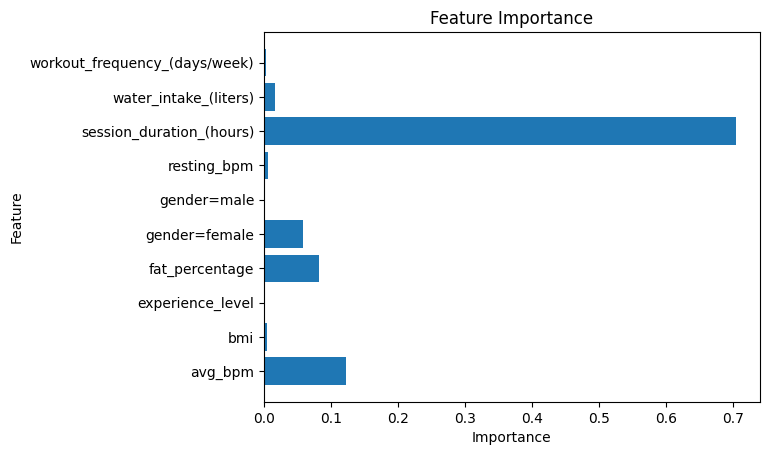

In [87]:
plt.barh(dv.feature_names_, final_model.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## FINAL MODEL

The final model is the xgboost because it has the best metrics.